<center><b><H1> DS 203: Assignment 5 </H1></b></center>
<center><b><H2> Name: Vinit Awale </H2></b></center>
<center><b><H2> Roll No. 18D070067 </H2></b></center>
<center><b><H2> Date: 26/9/2021 </H2></b></center>

## <b> Question 1 </b>
### For the data source at https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016 , perform the following steps in python using pandas, matplotlib and/or seaborn. Use code cells to perform functions with a comment for each line explaining what it is doing (and using intuitive variable names), and mark-down cells to note down any significant observations after each code cell (e.g., “Variable X appears to be normal distributed”):

### a) **Preliminaries**
#### i) Read the data file into a data frame.

In [1]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Read the given dataset
dataset = pd.read_csv("Dataset\\master.csv")

#### ii) Display a portion of the data to get a feel for the dataset

In [3]:
dataset.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
dataset.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


From the data, we can see that the data is regarding the analysis of the number of suicides in different countries in different years.
The features are:
- Country
- Year
- Sex
- age
- suicides_no
- population
- suicides/100k population
- country- year (This just seems to be a unique identifier for the entries and does not provide any additional information)
- HDI for year
- GDP for year
- GDP per capita 
- Generation (some form of categorical variable representing the kind of generation in the entry)

#### iii) Print the number of records.

In [5]:
dataset.shape[0]

27820

Hence, there are 27820 records in the dataset.

#### iv) Print the number of variables.

In [6]:
dataset.shape[1]

12

Hence, there are 12 variables in the dataset.

#### v) Print the datatype of each variable

In [7]:
datatypes =  dataset.dtypes

datatypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

#### vi) For each variable, print the number of unique values.

In [8]:
# Print number of unique values for each column
dataset.nunique()

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides/100k pop      5298
country-year           2321
HDI for year            305
 gdp_for_year ($)      2321
gdp_per_capita ($)     2233
generation                6
dtype: int64

#### vii) Identify nominal/categorical, ordinal, temporal (time stamps), integer (native but not nominal or ordinal), and continuous variables.

In [9]:
# Here, we append the variable type to the datatypes series we have created above

df = {"Variable" : datatypes.index, "Data type" : datatypes.values}             # Make a dictionary from the series
datatypes = pd.DataFrame(df)                                                    # Convert the dictionary into a dataframe

# Make a series of the type of variable 
variable_type = ["Nominal" , "temporal" , "Nominal" , "Ordinal" , "Integer" ,"Integer" , "Continuous" , "Nominal", "Continuous", "Integer", "Integer", "Nominal"]

# Append the list to the dataframe
datatypes["Variable type"] = variable_type

datatypes

,Variable,Data type,Variable type
0,country,object,Nominal
1,year,int64,temporal
2,sex,object,Nominal
3,age,object,Ordinal
4,suicides_no,int64,Integer
5,population,int64,Integer
6,suicides/100k pop,float64,Continuous
7,country-year,object,Nominal
8,HDI for year,float64,Continuous
9,gdp_for_year ($),object,Integer


Hence, we can see the variable types and their Data types in the above table.

##### Before moving ahead let us convert the values of "gdp_for_year ($)" into int for better handling the variable

In [10]:
# Converting the feature " gdp_for_year ($) " into an integer

dataset[" gdp_for_year ($) "] = pd.to_numeric(dataset[" gdp_for_year ($) "].str.replace(',', '') )

#### viii) For each variable, print the number of missing values.

In [11]:
dataset.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

Hence, we can see that only one variable (HDI for year) has missing values.

#### ix) Find the number of records with no missing entries.

From the previous part, we can see that 19456 records have missing values for the feature **HDI for year**.

### b) **Discrete Variables**

### The discrete numerical variables are 
### 1. suicides_no
### 2. population
### 3. gdp_per_capita

In [12]:
discrete_variables = ["suicides_no", "population", " gdp_for_year ($) ","gdp_per_capita ($)"]

#### i) For each variable, plot the frequency of each unique value (histogram).

<Figure size 1080x360 with 0 Axes>

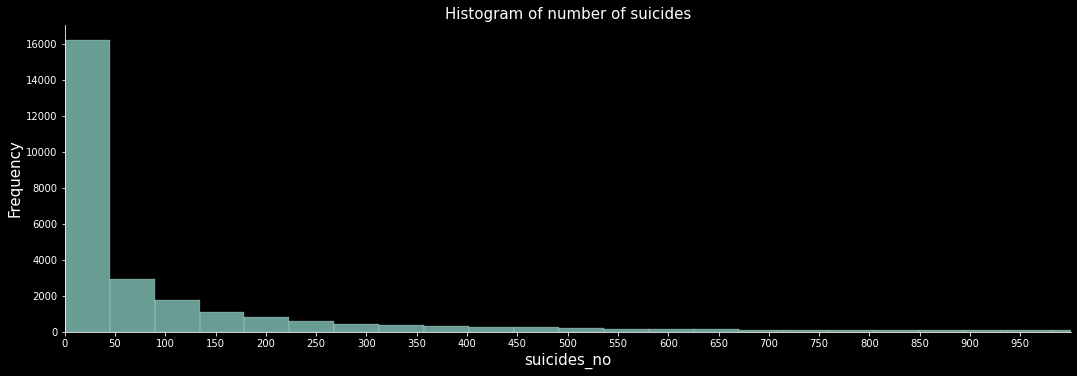

<Figure size 1080x360 with 0 Axes>

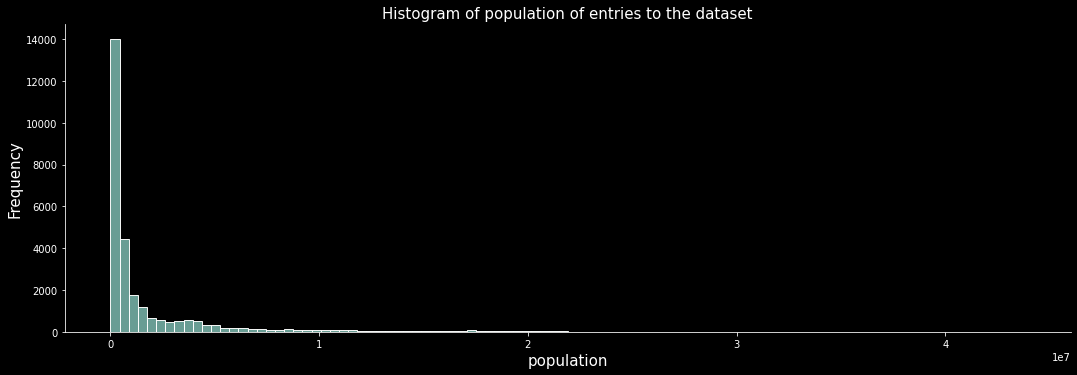

<Figure size 1080x360 with 0 Axes>

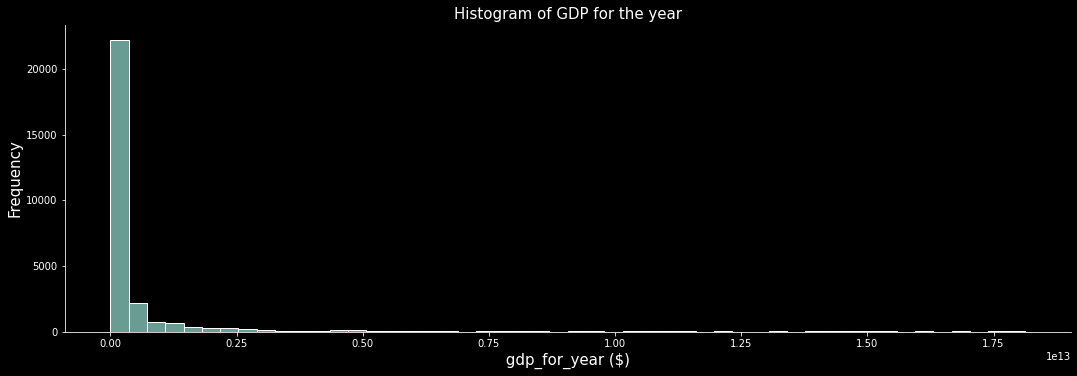

<Figure size 1080x360 with 0 Axes>

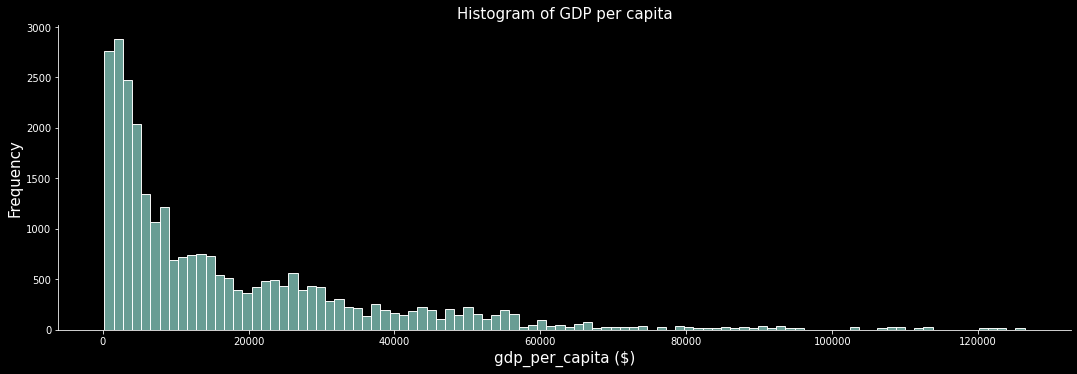

In [13]:
# Plot the histogram for the discrete variables
# Here I have assumed a bin width of 1

# histogram for the discrete variables
plt.figure(figsize=(15,5))
# plt.hist(dataset[discrete_variables[0]], bins=500)
sns.displot(dataset[discrete_variables[0]], bins=500, height=5, aspect=3)
plt.xlim(0,1000)
plt.title("Histogram of number of suicides" , fontsize=15)
plt.xlabel(discrete_variables[0] , fontsize=15)
plt.ylabel("Frequency" , fontsize=15)
plt.xticks(np.arange(0,1000,50))
plt.show()


plt.figure(figsize=(15,5))
# plt.hist(dataset[discrete_variables[1]], bins=100)
sns.displot(dataset[discrete_variables[1]], bins=100, height=5, aspect=3)
plt.title("Histogram of population of entries to the dataset" , fontsize=15)
plt.xlabel(discrete_variables[1], fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.show()


plt.figure(figsize=(15,5))
# plt.hist(dataset[discrete_variables[2]], bins=100)
sns.displot(dataset[discrete_variables[2]], bins=50, height=5, aspect=3)
plt.title("Histogram of GDP for the year", fontsize=15)
plt.xlabel(discrete_variables[2] , fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.show()

plt.figure(figsize=(15,5))
# plt.hist(dataset[discrete_variables[3]], bins=100)
sns.displot(dataset[discrete_variables[3]], bins=100, height=5, aspect=3)
plt.title("Histogram of GDP per capita", fontsize=15)
plt.xlabel(discrete_variables[3] , fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.show()



We also plot histogram for the variables **year**, **sex**, **age**, **generation**

<Figure size 1080x360 with 0 Axes>

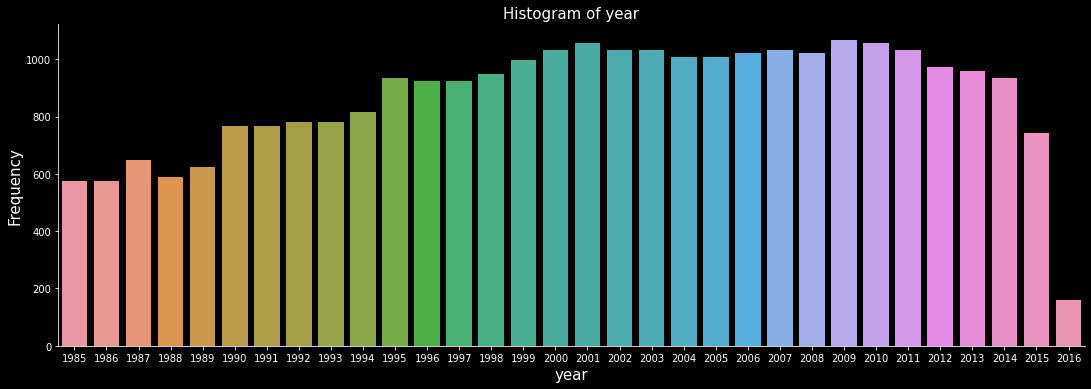

In [14]:
## Histogram for the varaible "year"

plt.figure(figsize=(15,5))
sns.catplot(x = "year", kind = 'count', data = dataset, aspect = 3)
plt.title("Histogram of year", fontsize=15)
plt.xlabel("year" , fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.show()

Hence, the dataset has quite some variation with respect to the variable "year"

<Figure size 1080x360 with 0 Axes>

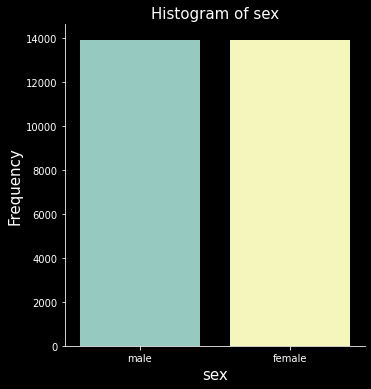

In [15]:
## Histogram for the varaible "sex"

plt.figure(figsize=(15,5))
sns.catplot(x = "sex", kind = 'count', data = dataset, aspect = 1)
plt.title("Histogram of sex", fontsize=15)
plt.xlabel("sex" , fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.show()


Hence, we can see that the entries for both the sexes are the same in number

<Figure size 1080x360 with 0 Axes>

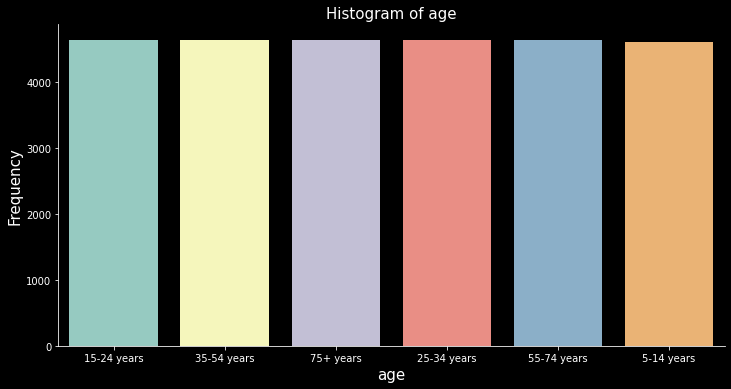

In [16]:
## Histogram for the varaible "age"

plt.figure(figsize=(15,5))
sns.catplot(x = "age", kind = 'count', data = dataset, aspect = 2)
plt.title("Histogram of age", fontsize=15)
plt.xlabel("age" , fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.show()

Hence, the entries are balanced with respect to all the age groups

<Figure size 1080x360 with 0 Axes>

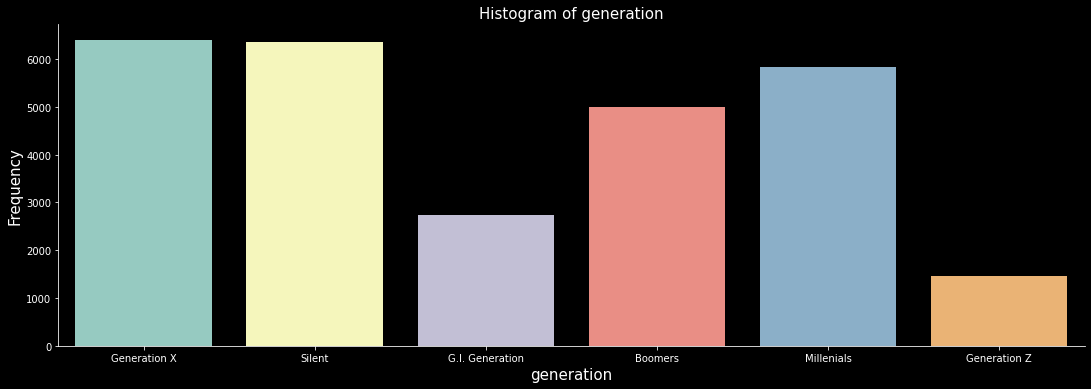

In [17]:
## histogram for the varaible "generation"

plt.figure(figsize=(15,5))
sns.catplot(x = "generation", kind = 'count', data = dataset, aspect = 3)
plt.title("Histogram of generation", fontsize=15)
plt.xlabel("generation" , fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.show()

In [18]:
## Mode values for the discrete variables

for i in discrete_variables:
    print("Mode of the variable ", str(i) , " is ", dataset[i].mode()[0])

Mode of the variable  suicides_no  is  0
Mode of the variable  population  is  24000
Mode of the variable   gdp_for_year ($)   is  46919625
Mode of the variable  gdp_per_capita ($)  is  1299


In [19]:
## Find the entropy of the discrete variables
from scipy.stats import entropy

for i in discrete_variables:
    print("Entropy of the variable ", str(i) , " is ", entropy(dataset[i]))

Entropy of the variable  suicides_no  is  8.441224052875892
Entropy of the variable  population  is  9.086968976099499
Entropy of the variable   gdp_for_year ($)   is  8.559932198183642
Entropy of the variable  gdp_per_capita ($)  is  9.716024392164645


Hence, we can see that all the variables have high entropy, which impies that the variable is well  distributed

### c) **Continuous Variables**

In [20]:
datatypes

,Variable,Data type,Variable type
0,country,object,Nominal
1,year,int64,temporal
2,sex,object,Nominal
3,age,object,Ordinal
4,suicides_no,int64,Integer
5,population,int64,Integer
6,suicides/100k pop,float64,Continuous
7,country-year,object,Nominal
8,HDI for year,float64,Continuous
9,gdp_for_year ($),object,Integer


In [21]:
## The continuous variables are the following:
continuous_variables = ["suicides/100k pop", "gdp_per_capita ($)"]

#### i) For each variable, print mean, variance, skew, min, max, median, 25th percentile, 75th percentile, and inter-quartile range.

In [22]:
## Mean, variance, skew, min, max, median, 25th percentile, 75th percentile, and inter-quartile range 

for i in continuous_variables:
    print("Mean of the variable ", str(i) , " is ", dataset[i].mean())
    print("Variance of the variable ", str(i) , " is ", dataset[i].var())
    print("Skew of the variable ", str(i) , " is ", dataset[i].skew())
    print("Minimum of the variable ", str(i) , " is ", dataset[i].min())
    print("Maximum of the variable ", str(i) , " is ", dataset[i].max())
    print("Median of the variable ", str(i) , " is ", dataset[i].median())
    print("25th percentile of the variable ", str(i) , " is ", dataset[i].quantile(0.25))
    print("75th percentile of the variable ", str(i) , " is ", dataset[i].quantile(0.75))
    print("Inter-quartile range of the variable ", str(i) , " is ", dataset[i].quantile(0.75) - dataset[i].quantile(0.25))
    print("\n")


Mean of the variable  suicides/100k pop  is  12.816097411933864
Variance of the variable  suicides/100k pop  is  359.538899953126
Skew of the variable  suicides/100k pop  is  2.963414476605633
Minimum of the variable  suicides/100k pop  is  0.0
Maximum of the variable  suicides/100k pop  is  224.97
Median of the variable  suicides/100k pop  is  5.99
25th percentile of the variable  suicides/100k pop  is  0.92
75th percentile of the variable  suicides/100k pop  is  16.62
Inter-quartile range of the variable  suicides/100k pop  is  15.700000000000001


Mean of the variable  gdp_per_capita ($)  is  16866.464414090584
Variance of the variable  gdp_per_capita ($)  is  356740544.99341345
Skew of the variable  gdp_per_capita ($)  is  1.9634699942792686
Minimum of the variable  gdp_per_capita ($)  is  251
Maximum of the variable  gdp_per_capita ($)  is  126352
Median of the variable  gdp_per_capita ($)  is  9372.0
25th percentile of the variable  gdp_per_capita ($)  is  3447.0
75th percentile 

#### ii) For each variable, plot box-and-whiskers plots

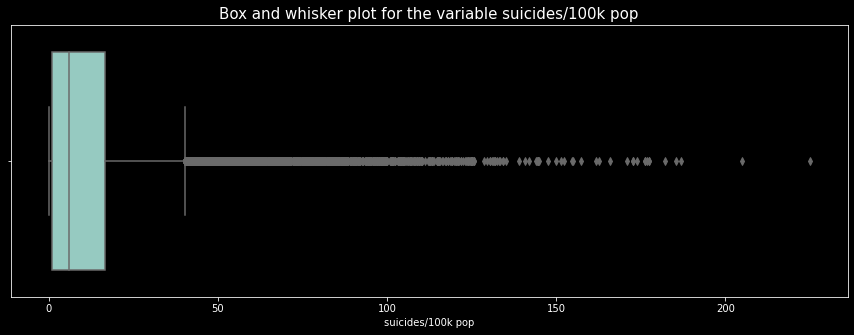

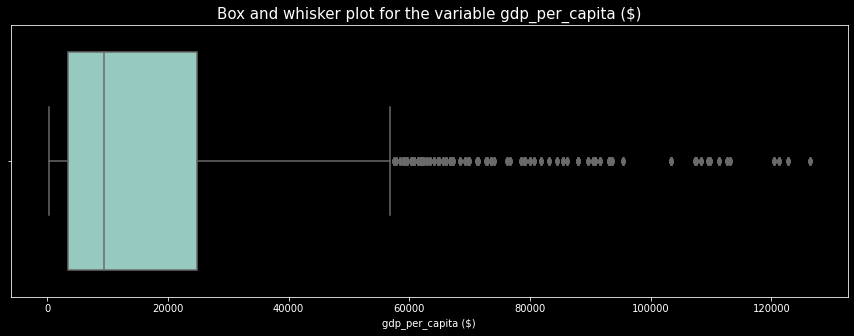

In [23]:
# Plot the box and whisker plot for the continuous variables
for i in continuous_variables:
    plt.figure(figsize=(15,5)) 
    sns.boxplot(x=i, data=dataset)
    plt.title("Box and whisker plot for the variable " + str(i) , fontsize=15)
    plt.show()
    

#### iii) For each variable, plot the histogram three times: with too few bins, too many bins, good number of bins

Too few bins for making histogram

C:\Users\Vinit\anaconda3\envs\gpu-pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


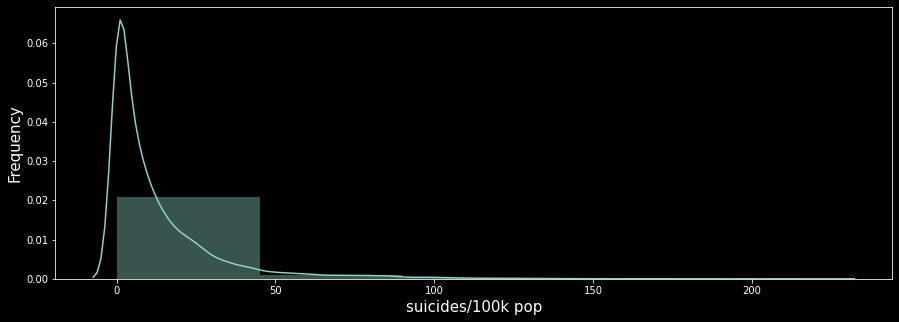

C:\Users\Vinit\anaconda3\envs\gpu-pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


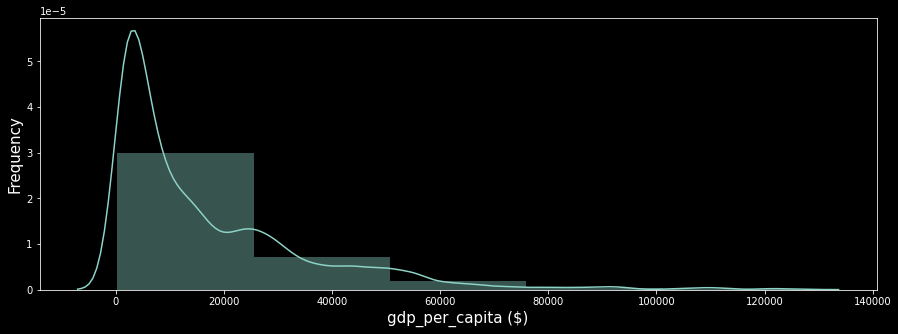

In [24]:
## Making histograms for the continuous variables with too few bins

for i in continuous_variables:
    plt.figure(figsize=(15,5))
    sns.distplot(dataset[i], bins=5)
    plt.xlabel(i , fontsize=15)
    plt.ylabel("Frequency", fontsize=15)
    plt.show()

Making histogram with too many bins

C:\Users\Vinit\anaconda3\envs\gpu-pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


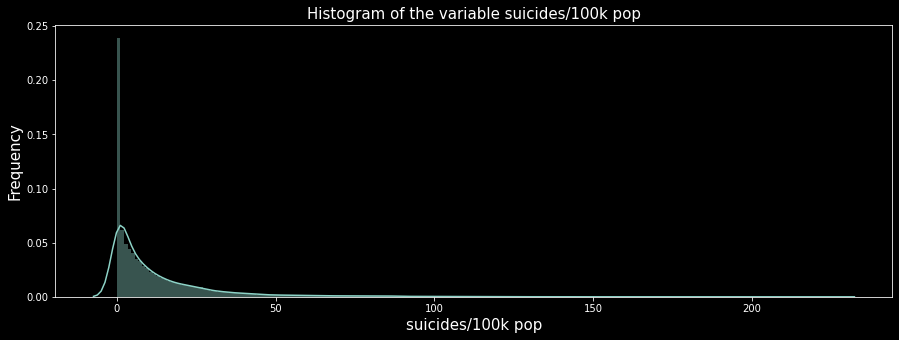

C:\Users\Vinit\anaconda3\envs\gpu-pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


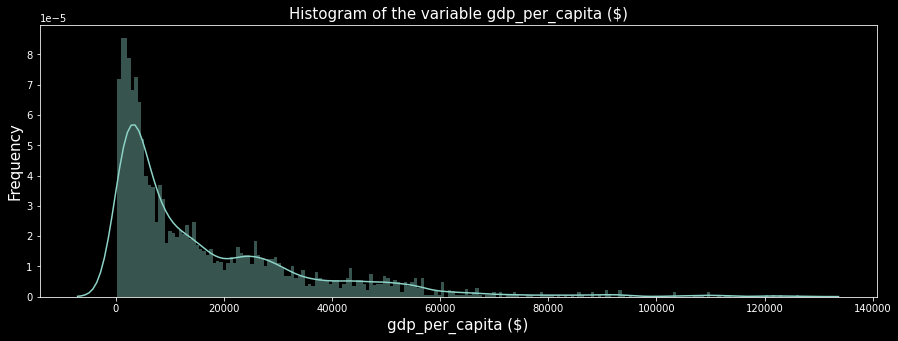

In [25]:
## Making histograms for the continuous variables with too many bins

for i in continuous_variables:
    plt.figure(figsize=(15,5)) 
    sns.distplot(dataset[i], bins=200)
    plt.title("Histogram of the variable " + str(i) , fontsize=15)
    plt.xlabel(i , fontsize=15)
    plt.ylabel("Frequency", fontsize=15)
    plt.show()

Making histogram with good number of bins

C:\Users\Vinit\anaconda3\envs\gpu-pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


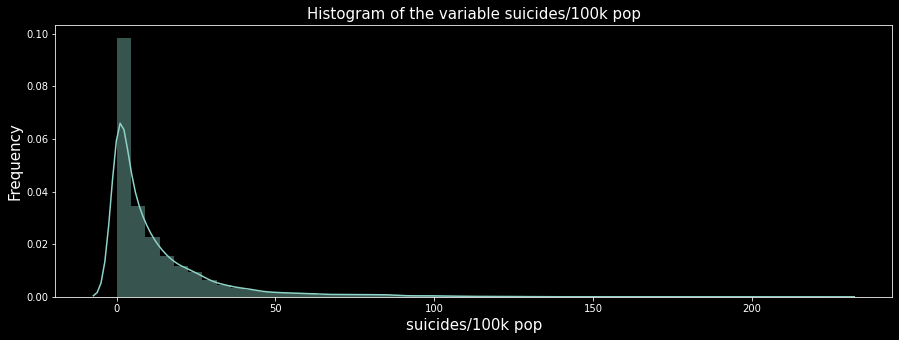

C:\Users\Vinit\anaconda3\envs\gpu-pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


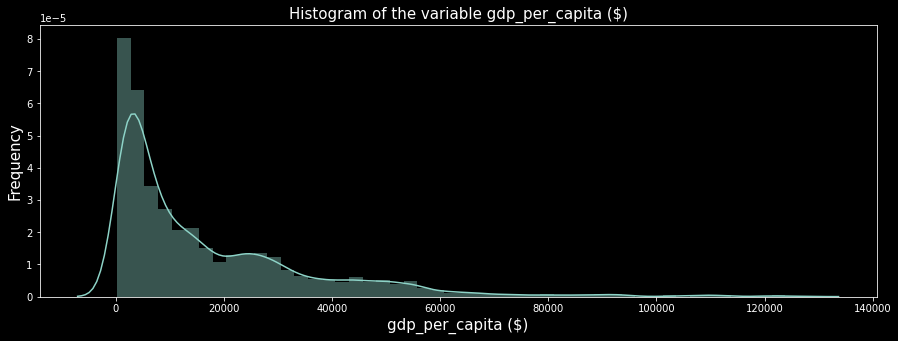

In [26]:
## Making histogram for the continuous variables with a bin width of 50

for i in continuous_variables:
    plt.figure(figsize=(15,5))
    sns.distplot(dataset[i], bins=50)
    plt.title("Histogram of the variable " + str(i) , fontsize=15)
    plt.xlabel(i , fontsize=15)
    plt.ylabel("Frequency", fontsize=15)
    plt.show()

Hence a bin size of 50 is the best choice for the histogram

##### iv) For each variable, use QQ-plot to see the extent to which the variable deviates from normal distribution, and how (left-skew, right-skew, or more like uniform distribution)

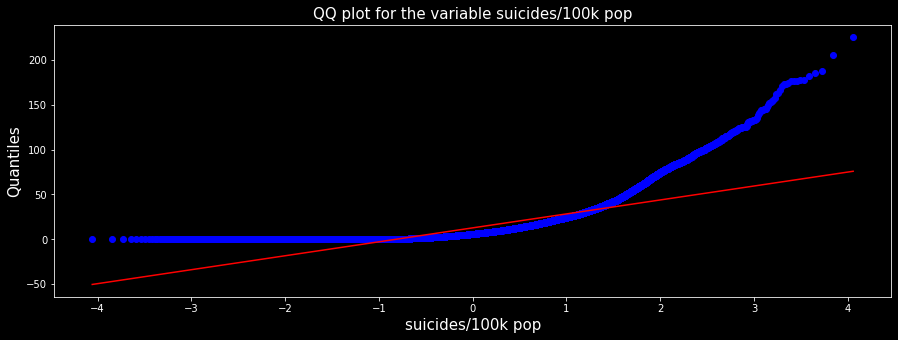

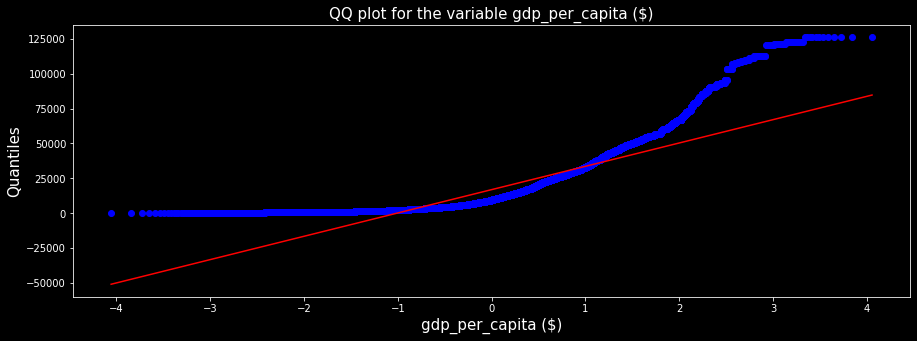

In [27]:
## Making QQ plot for the continuous variables

from scipy import stats

for i in continuous_variables:
    plt.figure(figsize=(15,5))
    stats.probplot(dataset[i], plot=sns.mpl.pyplot)
    plt.title("QQ plot for the variable " + str(i) , fontsize=15)
    plt.xlabel(i , fontsize=15)
    plt.ylabel("Quantiles", fontsize=15)
    plt.show()

In [28]:
# TODO 

#### v) For each variable, check if the variable deviates is log-normal distribution.

C:\Users\Vinit\anaconda3\envs\gpu-pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


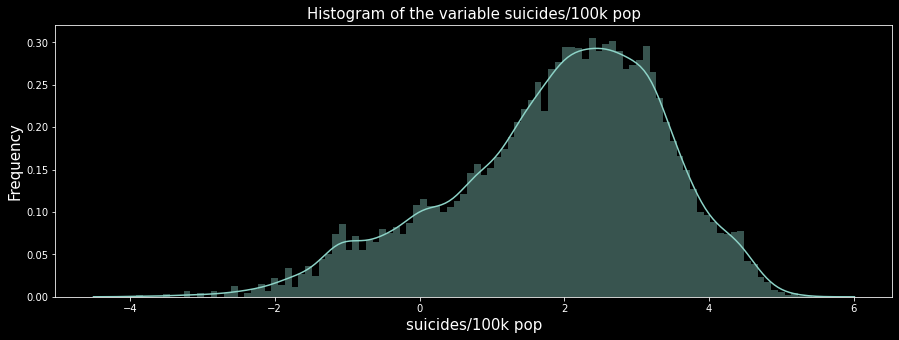

C:\Users\Vinit\anaconda3\envs\gpu-pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


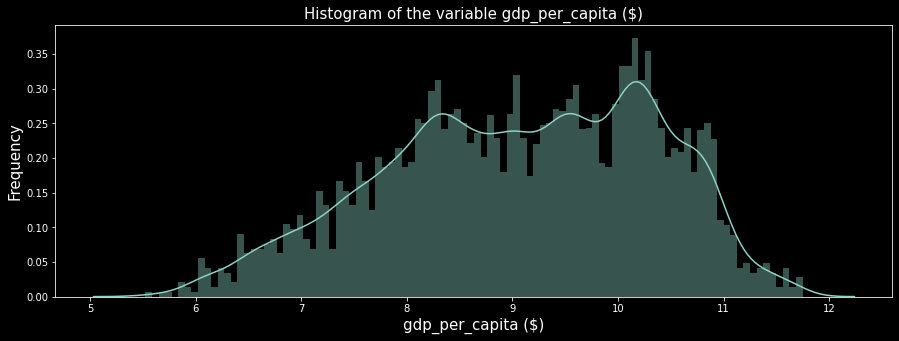

In [29]:
## Checking the continuous variables have log-normal distributions

for i in continuous_variables:
    plt.figure(figsize=(15,5))
    # Ignore zero values in the log-normal distribution
    sns.distplot(np.log(dataset[i][dataset[i] > 0]), bins=100)
    plt.title("Histogram of the variable " + str(i) , fontsize=15)
    plt.xlabel(i , fontsize=15)
    plt.ylabel("Frequency", fontsize=15)
    plt.show()

In [30]:
# TODO: 

### d) **Pair-wise interaction**

##### i) Pick a two discrete-continuous pairs, and plot box-and-whiskers plot for the continuous variable side-by-side for each value of the discrete variable.


The discrete variable I will use for this part is "sex" and "age" the continuous variable I will use is "suicides/100k pop"

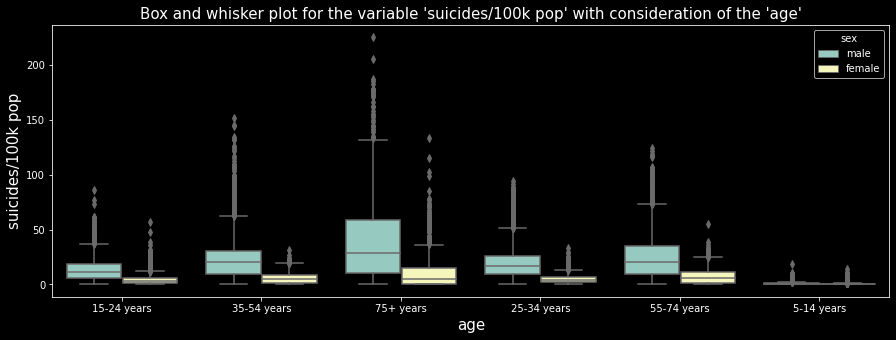

In [31]:
# Box and whisker plot for the variable "suicides/100k pop" with consideration of the "age" and "sex"

plt.figure(figsize=(15,5))
sns.boxplot(x="age", y="suicides/100k pop", data=dataset, hue="sex")
plt.title("Box and whisker plot for the variable 'suicides/100k pop' with consideration of the 'age'", fontsize=15)
plt.xlabel("age" , fontsize=15)
plt.ylabel("suicides/100k pop", fontsize=15)
plt.show()

Here, we can see that the median suicides/100k pop are less for females than for males in all age groups

Now using the discrete variables as "age" and "generation" and the discrete variable as "suicides"

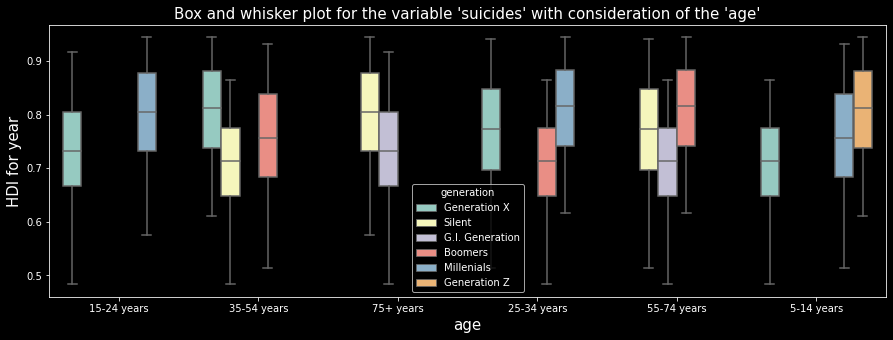

In [32]:
# Box and whisker plot for the variable "HDI for year" with consideration of the "age" and "generation"

plt.figure(figsize=(15,5))
sns.boxplot(x="age", y="HDI for year", data=dataset, hue="generation")
plt.title("Box and whisker plot for the variable 'suicides' with consideration of the 'age'", fontsize=15)
plt.xlabel("age" , fontsize=15)
plt.ylabel("HDI for year", fontsize=15)
plt.show()

#### ii) Plot a heatmap of correlation between all pairs of continuous variables

In [33]:
# append continuous variables to the list of discrete variables in the variables list
variables  = discrete_variables + continuous_variables

In [34]:
variables = set(variables)

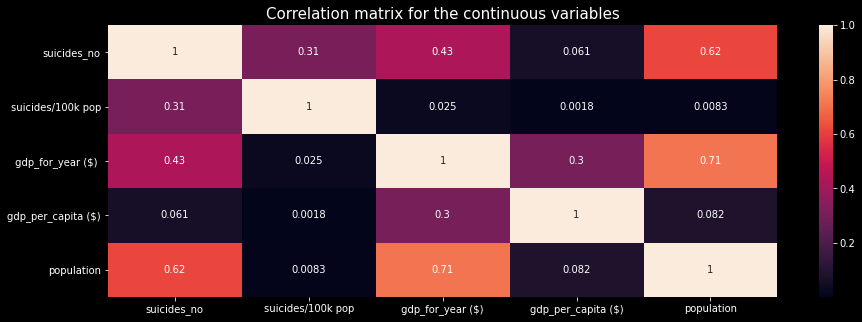

In [35]:
## Correlation matrix for the continuous variables
plt.figure(figsize=(15,5))
sns.heatmap(dataset[variables].corr(), annot=True)
plt.title("Correlation matrix for the continuous variables", fontsize=15)
plt.show()


In [36]:
# TODO

## **Question 2**

#### a) Pick the top six countries by average yearly suicides, and display their suicide for each year separately.


In [37]:
## Top six countries with highest average yearly suicides


countries = dataset["country"].unique()

print(countries)

['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South 

These are all the countries in the dataset.


In [38]:
# Find average yearly suicides for each country

avg_suicides = {}

for i in countries:
    avg_suicides[i] = dataset[dataset["country"] == i]["suicides_no"].mean()

## Append the column "avg_suicides" to the dataset
dataset["avg_suicides"] = dataset["country"].map(avg_suicides)


In [39]:
dataset.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,avg_suicides
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X,7.462121
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent,7.462121
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X,7.462121
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation,7.462121
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers,7.462121


In [40]:
dataset.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,avg_suicides
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,63067077179,2309,Generation X,131.829545
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,63067077179,2309,Silent,131.829545
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,63067077179,2309,Generation Z,131.829545
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,63067077179,2309,Generation Z,131.829545
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,63067077179,2309,Boomers,131.829545


In [41]:
# Sort the avg_suicides in ascending order and find the top six countries

sorted_avg_suicides = dict(sorted(avg_suicides.items(), key=lambda item: item[1]))
print("The top six countries are")
print(list(sorted_avg_suicides.keys())[:-7:-1])

The top six countries are
['Russian Federation', 'United States', 'Japan', 'Ukraine', 'Germany', 'France']


Hence, we can see that Russian Federation has the highest average suicide rate

<Figure size 1080x360 with 0 Axes>

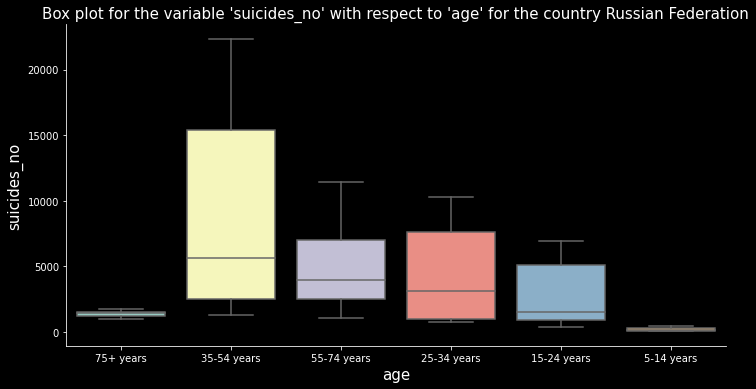

<Figure size 1080x360 with 0 Axes>

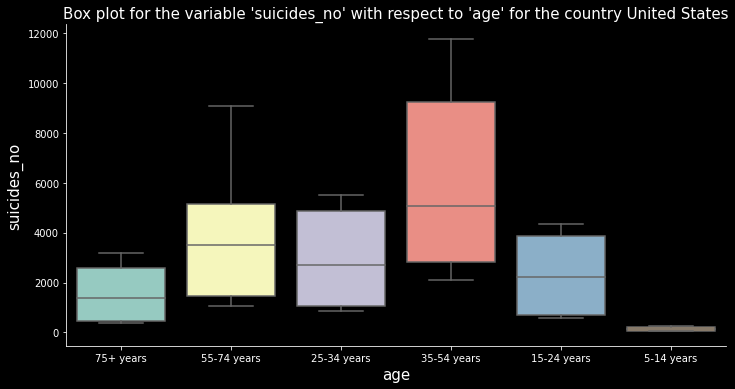

<Figure size 1080x360 with 0 Axes>

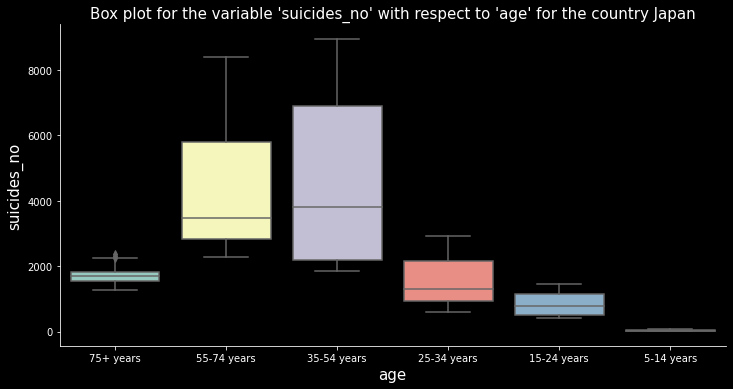

<Figure size 1080x360 with 0 Axes>

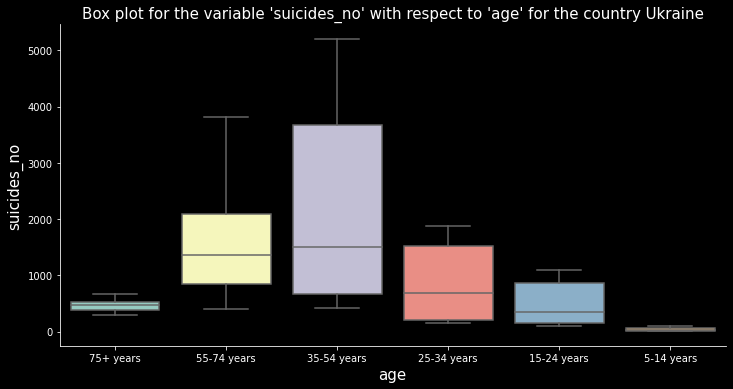

<Figure size 1080x360 with 0 Axes>

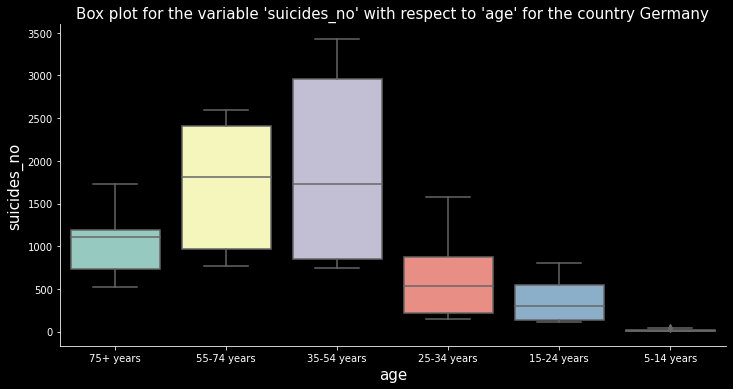

<Figure size 1080x360 with 0 Axes>

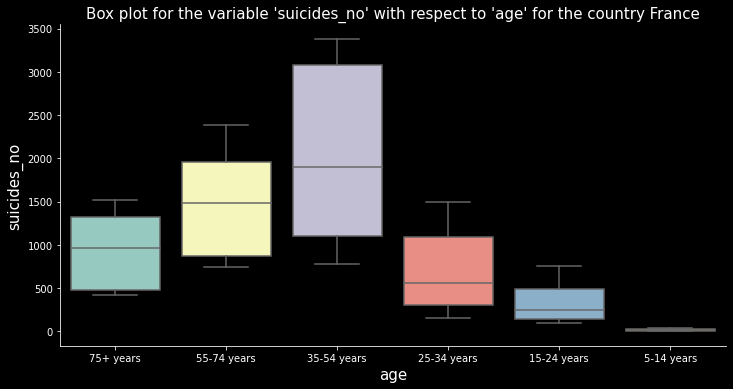

In [42]:
# save the top six countries in a list
top_six_countries = list(sorted_avg_suicides.keys())[:-7:-1]

# For each of these countries, find the average yearly with respect to age group

for i in top_six_countries:
    plt.figure(figsize=(15,5))
    sns.catplot(x="age", y="suicides_no", data=dataset[dataset["country"] == i], kind="box", aspect=2)
    plt.title("Box plot for the variable 'suicides_no' with respect to 'age' for the country " + str(i), fontsize=15)
    plt.xlabel("age" , fontsize=15)
    plt.ylabel("suicides_no", fontsize=15)
    plt.show()


- For all countries, max. number of suicides are commited by the age group "35-54 years". Also, the median number of suicides is highest for the age gruop "35-54 years" for all countries except Germany. For Germany, the median number of suicides is highest for the age group "55-74 years". 
- For all the countries, the minimum number of suicides is commited by the age group "5-14 years".

#### c) Plot an appropriate set of graphs or charts that highlight the consistency of difference between males and females when it comes to suicide rates

<Figure size 1080x216 with 0 Axes>

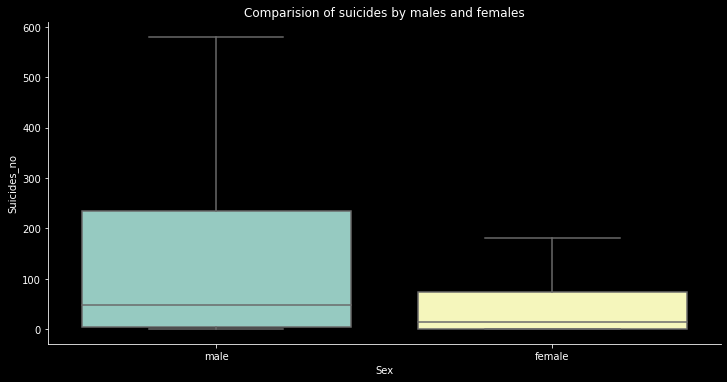

In [45]:
## Box and whisker plot for suicides by males and females

plt.figure(figsize=(15,3))
sns.catplot(x = "sex" , y = "suicides_no" , data = dataset, kind = 'box', aspect = 2 , showfliers = False)
plt.title("Comparision of suicides by males and females")
plt.ylabel("Suicides_no")
plt.xlabel("Sex")
plt.show()

#### Hence, we can easily see that median of suicides by males is more than the suicides by females.

#### d) Using an appropriate graph, show the worst year for each generation in the US

In [51]:
dataset

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,avg_suicides
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X,7.462121
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent,7.462121
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X,7.462121
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation,7.462121
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers,7.462121
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,63067077179,2309,Generation X,131.829545
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,63067077179,2309,Silent,131.829545
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,63067077179,2309,Generation Z,131.829545
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,63067077179,2309,Generation Z,131.829545


C:\Users\Vinit\anaconda3\envs\gpu-pytorch\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<Figure size 1080x360 with 0 Axes>

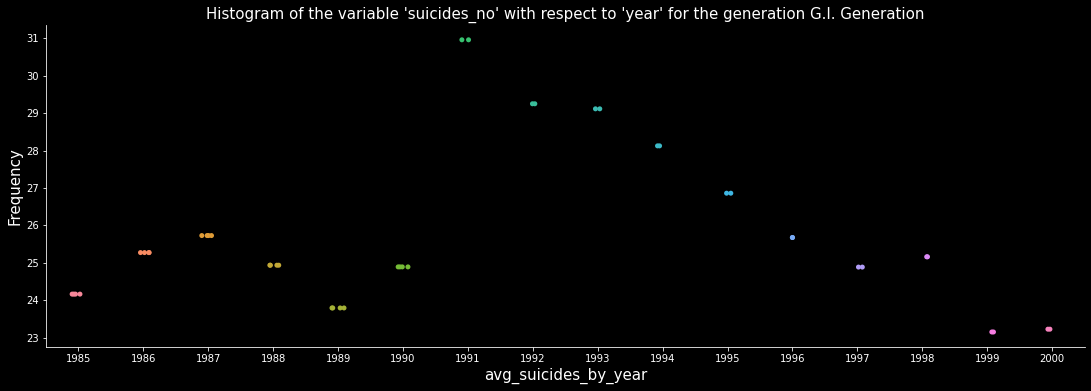

C:\Users\Vinit\anaconda3\envs\gpu-pytorch\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<Figure size 1080x360 with 0 Axes>

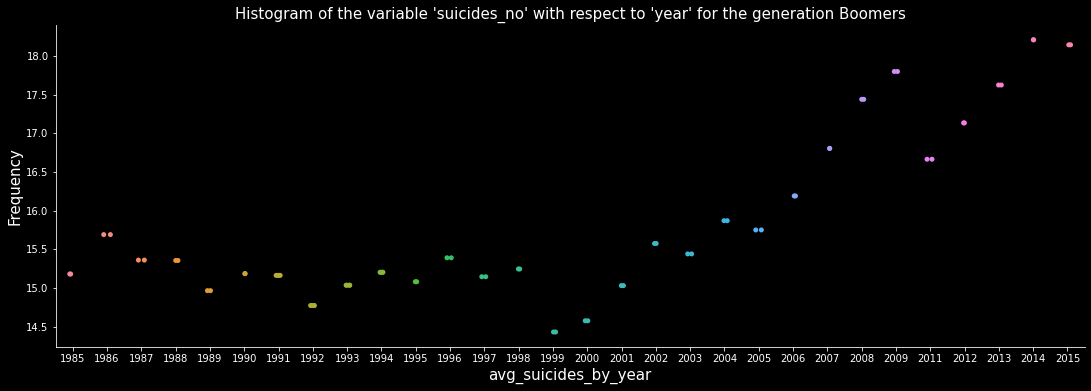

C:\Users\Vinit\anaconda3\envs\gpu-pytorch\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<Figure size 1080x360 with 0 Axes>

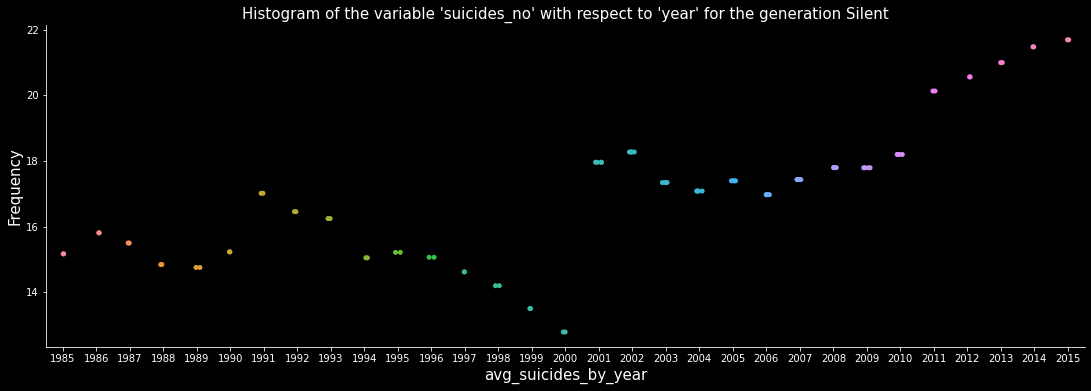

C:\Users\Vinit\anaconda3\envs\gpu-pytorch\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<Figure size 1080x360 with 0 Axes>

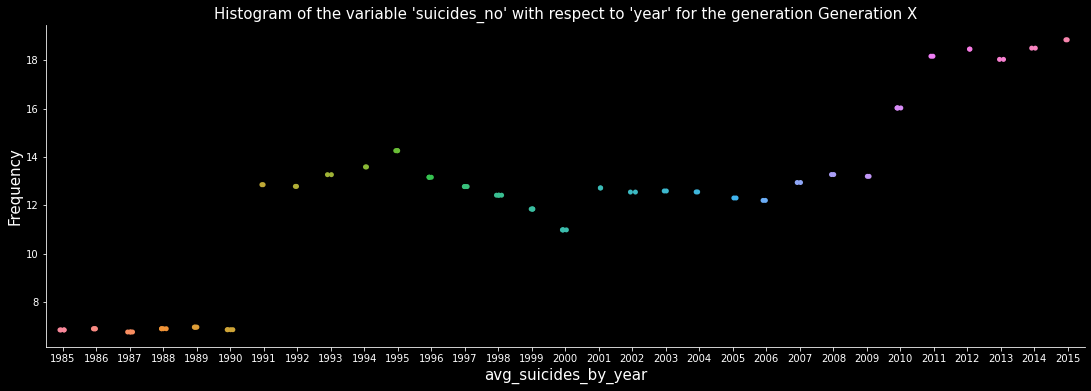

C:\Users\Vinit\anaconda3\envs\gpu-pytorch\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<Figure size 1080x360 with 0 Axes>

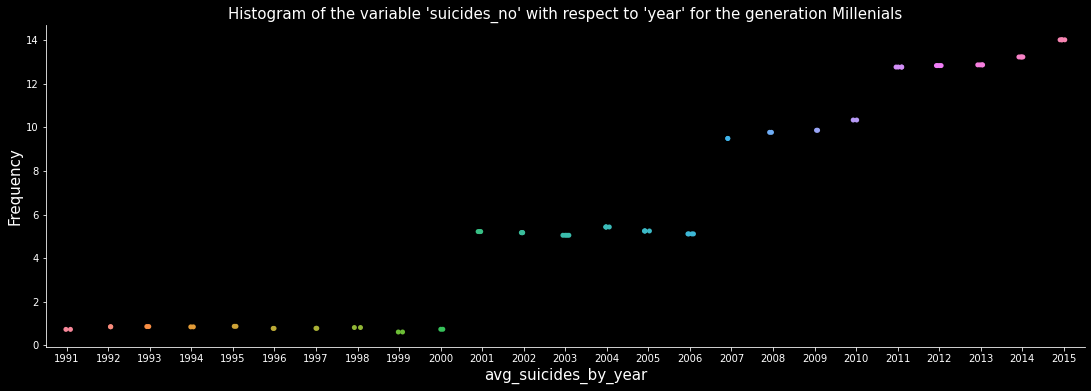

C:\Users\Vinit\anaconda3\envs\gpu-pytorch\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<Figure size 1080x360 with 0 Axes>

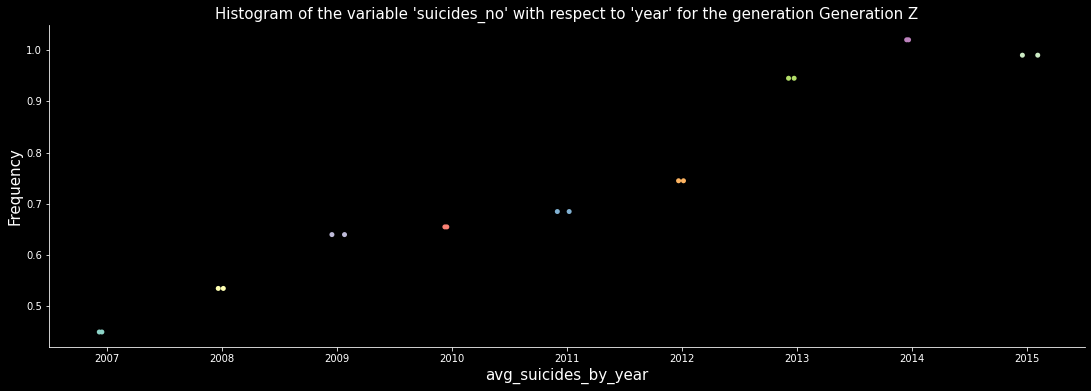

In [65]:
# Separate the dataset as data_US which contains the data about United States
data_US = dataset[dataset["country"] == "United States"]

# For each generation make a plot of avg_suicides with repect to that generation for each year in data_US

for i in data_US["generation"].unique():
    # Find mean of suicides_no for each year for each generation
    avg_suicides_by_year = {}
    for j in data_US["year"].unique():
        avg_suicides_by_year[j] = data_US[(data_US["year"] == j) & (data_US["generation"] == i)]["suicides/100k pop"].mean()

    # Append the column "avg_suicides_by_year" to the dataset
    data_US["avg_suicides_by_year"] = data_US["year"].map(avg_suicides_by_year)

    # Plot the avg_suicides_by_year vs year for each generation
    plt.figure(figsize=(15,5))
    sns.catplot(x="year", y="avg_suicides_by_year", data=data_US[data_US["generation"] == i] , aspect=3)
    plt.title("Histogram of the variable 'suicides_no' with respect to 'year' for the generation " + str(i), fontsize=15)
    plt.xlabel("avg_suicides_by_year" , fontsize=15)
    plt.ylabel("Frequency", fontsize=15)
    plt.show()





Hence from the plots we can see the generation wise worst years are as follows:
- G.I. generation : 1991
- Boomers : 2014
- Silent : 2015
- Generation X : 2015
- Millennials : 2015
- Baby Boomers : 2014

### e) Plot a bihistogram for a few specific countries (for a year, say 2000) for male and female populations by age ranges to highlight some differences in sex ratios between countries.

In [79]:
# Find mean number of male suicides in US for each year
male_suicides_US = dataset[(dataset["country"] == "United States") & (dataset["sex"] == "male")][["suicides/100k pop","year"]]
female_suicides_US = dataset[(dataset["country"] == "United States") & (dataset["sex"] == "female")][["suicides/100k pop","year"]]


In [101]:
# Make a dataframe with males and females suicides in the United States

suicides_US = pd.DataFrame()
suicides_US["year"] = male_suicides_US["year"]
suicides_US["male_suicides/100k pop"] = male_suicides_US["suicides/100k pop"]
suicides_US["female_suicides/100k pop"] = female_suicides_US["suicides/100k pop"]



C:\Users\Vinit\anaconda3\envs\gpu-pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Vinit\anaconda3\envs\gpu-pytorch\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


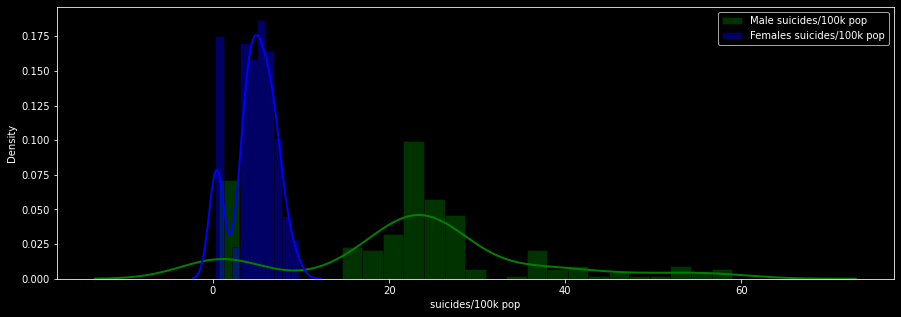

In [120]:
fig, ax = plt.subplots(figsize=(15,5), sharex = True)
sns.distplot(male_suicides_US["suicides/100k pop"], hist=True, kde=True, hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 2}, bins=25,
             color='green', label = "Male suicides/100k pop")

sns.distplot(female_suicides_US["suicides/100k pop"], hist=True, kde=True, hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 2}, bins=10,
             color='blue',  label = "Females suicides/100k pop")
plt.legend()
plt.show()

Hence, we can see that the median of suicides/100k population is higher for males than females in the United States  
*Note*: I was unable to flip the y axis for one of the plots. I did the solutions mentioned in the PDF of questions, but they did not work for me

### f) Show a bubble plot to show the relation between suicide rates, human development index (HDI), and population.

In [ ]:
# Bubble plot for suicides rate, HDI and population
plt.figure(figsize=(15,5))

